## 6. 그래프 꾸미기(text, 이중축) & 교차분석표
- 이번 주피터 노트북에 사용한 데이터는 캐글의 [Categorical Feature Encoding Challenge](https://www.kaggle.com/competitions/cat-in-the-dat) 입니다 :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv', index_col = 'id')
df.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [3]:
ord_col = df.columns[df.columns.str.contains('ord')]
df[ord_col].dtypes

ord_0     int64
ord_1    object
ord_2    object
ord_3    object
ord_4    object
ord_5    object
dtype: object

## 1. 그래프 위에 비율 써주기
nom_1은 범주형 데이터이므로 분포 확인을 위해 countplot을 활용

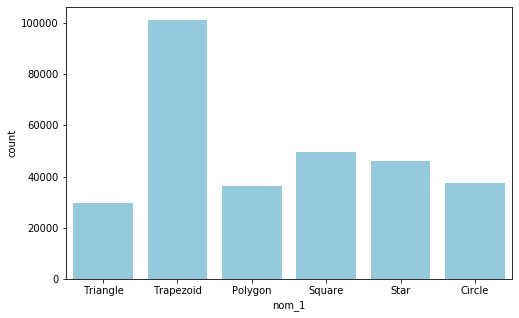

In [4]:
plt.figure(figsize = (8, 5))
ax = sns.countplot(x = 'nom_1', data = df, color = 'skyblue')
plt.show()

In [5]:
# 그래프 위에 비율을 써주기 위해 ax.patches를 이용한다.
# patches 메서드를 통해 불러온 것은 6개의 사각형 객체 각각을 가리킴 
ax.patches

In [6]:
# 여기서 가장 왼쪽 bar의 값(Triangle)에 대해서만 먼저 해보자! 
rec = ax.patches[0]
    # 각각 왼쪽 bar의 높이(개수), 가로길이, 왼쪽 테두리의 x축 
print(rec.get_height(), rec.get_width(), rec.get_x())

29855 0.8 -0.4


In [7]:
# 비율을 써줄 텍스트는 왼쪽 bar의 바로 위에 써줄 것이다
#Triangle 뽑기
left_square = df['nom_1'].unique()[0]

print('x좌표: ', rec.get_x() + rec.get_width()/2)
print('y좌표: ', rec.get_height() + len(df)*0.01)
print(f'{left_square}의 비율: ', (rec.get_height()/len(df))*100, '%')

x좌표:  0.0
y좌표:  32855.0
Triangle의 비율:  9.951666666666666 %


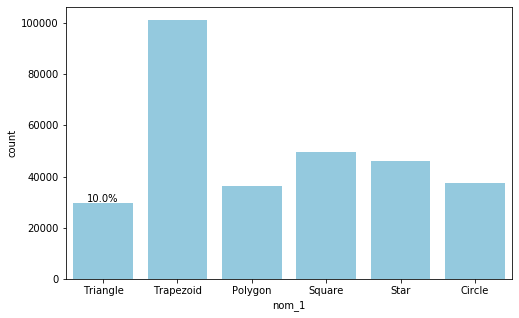

In [8]:
# 적용
plt.figure(figsize = (8, 5))
ax = sns.countplot(x = 'nom_1', data = df, color = 'skyblue')
ax.text(x = rec.get_x() + rec.get_width()/2,
            y = rec.get_height() + len(df)*0.001,
            s =  f'{rec.get_height()/len(df)*100:1.1f}%',
           ha = 'center')

plt.rc('font', size = 11)
plt.show()

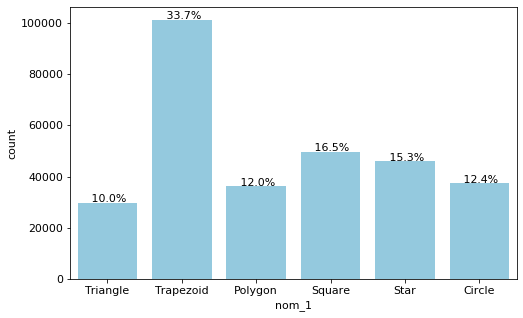

In [9]:
# for문으로 연결해서 모든 nom_1의 고유값에도 비율을 써보자
plt.figure(figsize = (8, 5))
ax = sns.countplot(x = 'nom_1', data = df, color = 'skyblue')

for patch in ax.patches:
    # 2개의 patch 값을 가짐
    ax.text(x = patch.get_x() + patch.get_width()/2,
               y = patch.get_height() + len(df)*0.001,
               s = f'{(patch.get_height()/len(df))*100: 1.1f}%',
               ha = 'center')
    
plt.rc('font', size = 11)
plt.show()

## 2. pandas crosstab
범주형 데이터 2개를 비교분석할 때 사용되는 표. 고유값별 target이 1인 비율을 구해보자.

In [10]:
import pandas as pd

df = pd.read_csv('train.csv', index_col = 'id')
df.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [11]:
pd.crosstab(df['nom_1'], df['target'])

target,0,1
nom_1,,
Circle,28152,9168
Polygon,24741,11402
Square,32787,16810
Star,31645,14259
Trapezoid,71833,29348
Triangle,19078,10777


In [12]:
pd.crosstab(df['nom_1'], df['target'], margins = True)

target,0,1,All
nom_1,,,
Circle,28152,9168,37320
Polygon,24741,11402,36143
Square,32787,16810,49597
Star,31645,14259,45904
Trapezoid,71833,29348,101181
Triangle,19078,10777,29855
All,208236,91764,300000


In [13]:
pd.crosstab(df['nom_1'], df['target'], margins = True, margins_name = 'All')

target,0,1,All
nom_1,,,
Circle,28152,9168,37320
Polygon,24741,11402,36143
Square,32787,16810,49597
Star,31645,14259,45904
Trapezoid,71833,29348,101181
Triangle,19078,10777,29855
All,208236,91764,300000


In [14]:
pd.crosstab(df['nom_1'], df['target'], normalize = 'all')

target,0,1
nom_1,,
Circle,0.093840,0.030560
Polygon,0.082470,0.038007
Square,0.109290,0.056033
Star,0.105483,0.047530
Trapezoid,0.239443,0.097827
Triangle,0.063593,0.035923


In [15]:
# 개수가 아닌 비율 - index 기준
pd.crosstab(df['nom_1'], df['target'], normalize = 'index')

target,0,1
nom_1,,
Circle,0.754341,0.245659
Polygon,0.684531,0.315469
Square,0.661068,0.338932
Star,0.689373,0.310627
Trapezoid,0.709946,0.290054
Triangle,0.639022,0.360978


In [16]:
pd.crosstab(df['nom_1'], df['target'], normalize = 'index', margins = True)

target,0,1
nom_1,,
Circle,0.754341,0.245659
Polygon,0.684531,0.315469
Square,0.661068,0.338932
Star,0.689373,0.310627
Trapezoid,0.709946,0.290054
Triangle,0.639022,0.360978
All,0.694120,0.305880


In [17]:
pd.crosstab(df['nom_1'], df['target'], normalize = 'columns', margins = True)

target,0,1,All
nom_1,,,
Circle,0.135193,0.099908,0.124400
Polygon,0.118812,0.124254,0.120477
Square,0.157451,0.183187,0.165323
Star,0.151967,0.155388,0.153013
Trapezoid,0.344960,0.319820,0.337270
Triangle,0.091617,0.117443,0.099517


In [18]:
# 개수가 아닌 비율 - columns 기준
pd.crosstab(df['nom_1'], df['target'], normalize = 'columns')

target,0,1
nom_1,,
Circle,0.135193,0.099908
Polygon,0.118812,0.124254
Square,0.157451,0.183187
Star,0.151967,0.155388
Trapezoid,0.344960,0.319820
Triangle,0.091617,0.117443


In [19]:
# 백분율
pd.crosstab(df['nom_1'], df['target'], normalize = 'index')*100

target,0,1
nom_1,,
Circle,75.434084,24.565916
Polygon,68.453089,31.546911
Square,66.106821,33.893179
Star,68.937348,31.062652
Trapezoid,70.994554,29.005446
Triangle,63.902194,36.097806


In [20]:
ct = pd.crosstab(df['nom_1'], df['target'], normalize = 'index')*100
ct[1]

nom_1
Circle       24.565916
Polygon      31.546911
Square       33.893179
Star         31.062652
Trapezoid    29.005446
Triangle     36.097806
Name: 1, dtype: float64

In [21]:
print(ct.index)
print()
print(ct[1])

Index(['Circle', 'Polygon', 'Square', 'Star', 'Trapezoid', 'Triangle'], dtype='object', name='nom_1')

nom_1
Circle       24.565916
Polygon      31.546911
Square       33.893179
Star         31.062652
Trapezoid    29.005446
Triangle     36.097806
Name: 1, dtype: float64


In [22]:
ct[1].values

array([24.5659164 , 31.54691088, 33.89317902, 31.06265249, 29.00544569,
       36.09780606])

In [23]:
ct.index

Index(['Circle', 'Polygon', 'Square', 'Star', 'Trapezoid', 'Triangle'], dtype='object', name='nom_1')

In [24]:
ct.index.values

array(['Circle', 'Polygon', 'Square', 'Star', 'Trapezoid', 'Triangle'],
      dtype=object)

## 3. 이중축 그래프 그리기
앞에서 그린 비율 countplot에 하나의 이중축을 더 만들어서, 크로스탭의 target = 1인 비율을 지정해보자

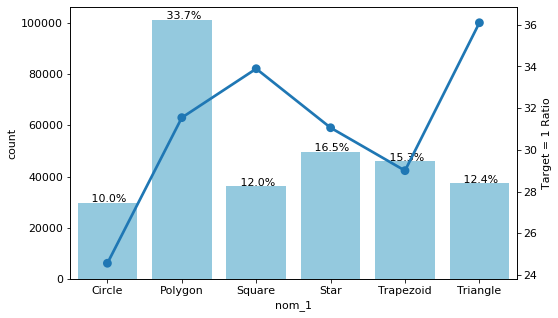

In [25]:
plt.figure(figsize = (8, 5))
ax = sns.countplot(x = 'nom_1', data = df, color = 'skyblue')

for patch in ax.patches:
    # 2개의 patch 값을 가짐
    ax.text(x = patch.get_x() + patch.get_width()/2,
               y = patch.get_height() + len(df)*0.001,
               s = f'{(patch.get_height()/len(df))*100: 1.1f}%',
               ha = 'center')
    
#---------------- 이중 축 생성 
ax2 = ax.twinx()
ct = pd.crosstab(df['nom_1'], df['target'], normalize = 'index')*100
ax2 = sns.pointplot(x = ct.index, y = ct[1], ax = ax2)
ax2.set_ylabel('Target = 1 Ratio')
    
plt.rc('font', size = 11)
plt.show()

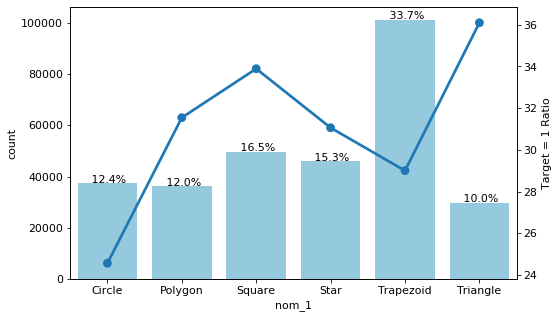

In [26]:
## order 맞춰주기 
plt.figure(figsize = (8, 5))
ax = sns.countplot(x = 'nom_1', data = df, color = 'skyblue', order = ct.index.values)

for patch in ax.patches:
    # 2개의 patch 값을 가짐
    ax.text(x = patch.get_x() + patch.get_width()/2,
               y = patch.get_height() + len(df)*0.001,
               s = f'{(patch.get_height()/len(df))*100: 1.1f}%',
               ha = 'center')
    
#---------------- 이중 축 생성 
ax2 = ax.twinx()
ct = pd.crosstab(df['nom_1'], df['target'], normalize = 'index')*100
ax2 = sns.pointplot(x = ct.index, y = ct[1].values, ax = ax2, order = ct.index.values)
ax2.set_ylabel('Target = 1 Ratio')
    
plt.rc('font', size = 11)
plt.show()

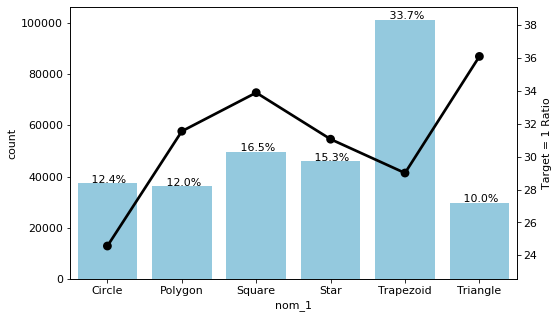

In [27]:
# pointplot 색상 및 y축 수정
## order 맞춰주기 
plt.figure(figsize = (8, 5))
ax = sns.countplot(x = 'nom_1', data = df, color = 'skyblue', order = ct.index.values)

for patch in ax.patches:
    # 2개의 patch 값을 가짐
    ax.text(x = patch.get_x() + patch.get_width()/2,
               y = patch.get_height() + len(df)*0.001,
               s = f'{(patch.get_height()/len(df))*100: 1.1f}%',
               ha = 'center')
    
#---------------- 이중 축 생성 
ax2 = ax.twinx()
ct = pd.crosstab(df['nom_1'], df['target'], normalize = 'index')*100
ax2 = sns.pointplot(x = ct.index, y = ct[1].values, ax = ax2, order = ct.index.values, color = 'k')
ax2.set_ylim(ct[1].min() - 2, ct[1].max() + 3)
ax2.set_ylabel('Target = 1 Ratio')
    
plt.rc('font', size = 11)
plt.show()

In [28]:
ct[1].values.min()

24.565916398713828

In [29]:
ct[1].values.max()

36.097806062636074